<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 1.0094453	total: 81ms	remaining: 1m 20s
1:	learn: 0.9876033	total: 85.7ms	remaining: 42.8s
2:	learn: 0.9651702	total: 90ms	remaining: 29.9s
3:	learn: 0.9483005	total: 95ms	remaining: 23.7s
4:	learn: 0.9290311	total: 98.6ms	remaining: 19.6s
5:	learn: 0.9110187	total: 104ms	remaining: 17.3s
6:	learn: 0.8946502	total: 109ms	remaining: 15.5s
7:	learn: 0.8769742	total: 111ms	remaining: 13.8s
8:	learn: 0.8605664	total: 116ms	remaining: 12.7s
9:	learn: 0.8429034	total: 119ms	remaining: 11.8s
10:	learn: 0.8268597	total: 123ms	remaining: 11.1s
11:	learn: 0.8104472	total: 127ms	remaining: 10.4s
12:	learn: 0.7945441	total: 134ms	remaining: 10.2s
13:	learn: 0.7786218	total: 137ms	remaining: 9.65s
14:	learn: 0.7656599	total: 141ms	remaining: 9.23s
15:	learn: 0.7519846	total: 144ms	remaining: 8.82s
16:	learn: 0.7383767	total: 146ms	remaining: 8.44s
17:	learn: 0.7254459	total: 149ms	remaining: 8.13s
18:	learn: 0.7123297	total: 152ms	remaining: 7.86s
19:	learn: 0

26:	learn: 0.6263185	total: 174ms	remaining: 6.25s
27:	learn: 0.6174424	total: 176ms	remaining: 6.12s
28:	learn: 0.6080488	total: 179ms	remaining: 6.01s
29:	learn: 0.5984462	total: 182ms	remaining: 5.89s
30:	learn: 0.5877596	total: 186ms	remaining: 5.82s
31:	learn: 0.5789198	total: 189ms	remaining: 5.72s
32:	learn: 0.5716524	total: 192ms	remaining: 5.62s
33:	learn: 0.5639325	total: 196ms	remaining: 5.56s
34:	learn: 0.5563100	total: 199ms	remaining: 5.49s
35:	learn: 0.5492708	total: 201ms	remaining: 5.39s
36:	learn: 0.5435714	total: 203ms	remaining: 5.29s
37:	learn: 0.5367755	total: 205ms	remaining: 5.19s
38:	learn: 0.5293364	total: 207ms	remaining: 5.09s
39:	learn: 0.5215144	total: 209ms	remaining: 5.02s
40:	learn: 0.5152947	total: 212ms	remaining: 4.95s
41:	learn: 0.5089015	total: 214ms	remaining: 4.88s
42:	learn: 0.5028474	total: 216ms	remaining: 4.8s
43:	learn: 0.4960373	total: 218ms	remaining: 4.75s
44:	learn: 0.4906561	total: 221ms	remaining: 4.7s
45:	learn: 0.4851784	total: 226ms

70:	learn: 0.3786197	total: 340ms	remaining: 4.45s
71:	learn: 0.3764259	total: 343ms	remaining: 4.42s
72:	learn: 0.3739528	total: 345ms	remaining: 4.38s
73:	learn: 0.3706642	total: 348ms	remaining: 4.35s
74:	learn: 0.3671406	total: 351ms	remaining: 4.33s
75:	learn: 0.3649159	total: 354ms	remaining: 4.3s
76:	learn: 0.3627204	total: 356ms	remaining: 4.27s
77:	learn: 0.3596647	total: 359ms	remaining: 4.24s
78:	learn: 0.3568251	total: 361ms	remaining: 4.21s
79:	learn: 0.3548489	total: 363ms	remaining: 4.18s
80:	learn: 0.3527058	total: 366ms	remaining: 4.15s
81:	learn: 0.3505741	total: 369ms	remaining: 4.13s
82:	learn: 0.3485174	total: 372ms	remaining: 4.11s
83:	learn: 0.3465271	total: 374ms	remaining: 4.08s
84:	learn: 0.3436010	total: 377ms	remaining: 4.06s
85:	learn: 0.3414384	total: 380ms	remaining: 4.04s
86:	learn: 0.3394233	total: 387ms	remaining: 4.06s
87:	learn: 0.3367125	total: 389ms	remaining: 4.03s
88:	learn: 0.3344060	total: 403ms	remaining: 4.12s
89:	learn: 0.3324013	total: 407m

102:	learn: 0.3106209	total: 471ms	remaining: 4.1s
103:	learn: 0.3093692	total: 475ms	remaining: 4.09s
104:	learn: 0.3071493	total: 477ms	remaining: 4.07s
105:	learn: 0.3054043	total: 480ms	remaining: 4.04s
106:	learn: 0.3037658	total: 482ms	remaining: 4.02s
107:	learn: 0.3017209	total: 486ms	remaining: 4.01s
108:	learn: 0.3001115	total: 491ms	remaining: 4.01s
109:	learn: 0.2993107	total: 494ms	remaining: 4s
110:	learn: 0.2977240	total: 497ms	remaining: 3.98s
111:	learn: 0.2965495	total: 500ms	remaining: 3.96s
112:	learn: 0.2949561	total: 502ms	remaining: 3.94s
113:	learn: 0.2939863	total: 505ms	remaining: 3.92s
114:	learn: 0.2924673	total: 507ms	remaining: 3.9s
115:	learn: 0.2910286	total: 510ms	remaining: 3.89s
116:	learn: 0.2900760	total: 513ms	remaining: 3.87s
117:	learn: 0.2888944	total: 515ms	remaining: 3.85s
118:	learn: 0.2876918	total: 518ms	remaining: 3.84s
119:	learn: 0.2868788	total: 521ms	remaining: 3.82s
120:	learn: 0.2852569	total: 523ms	remaining: 3.8s
121:	learn: 0.2842

153:	learn: 0.2533611	total: 631ms	remaining: 3.47s
154:	learn: 0.2521582	total: 636ms	remaining: 3.47s
155:	learn: 0.2514099	total: 639ms	remaining: 3.46s
156:	learn: 0.2508286	total: 642ms	remaining: 3.45s
157:	learn: 0.2502984	total: 645ms	remaining: 3.44s
158:	learn: 0.2496637	total: 648ms	remaining: 3.42s
159:	learn: 0.2487164	total: 651ms	remaining: 3.42s
160:	learn: 0.2476800	total: 654ms	remaining: 3.41s
161:	learn: 0.2468028	total: 656ms	remaining: 3.4s
162:	learn: 0.2464274	total: 660ms	remaining: 3.39s
163:	learn: 0.2457522	total: 662ms	remaining: 3.38s
164:	learn: 0.2451044	total: 665ms	remaining: 3.37s
165:	learn: 0.2443991	total: 668ms	remaining: 3.35s
166:	learn: 0.2437273	total: 670ms	remaining: 3.34s
167:	learn: 0.2429714	total: 673ms	remaining: 3.33s
168:	learn: 0.2424158	total: 675ms	remaining: 3.32s
169:	learn: 0.2417231	total: 678ms	remaining: 3.31s
170:	learn: 0.2405714	total: 681ms	remaining: 3.3s
171:	learn: 0.2400684	total: 684ms	remaining: 3.29s
172:	learn: 0.

208:	learn: 0.2148738	total: 793ms	remaining: 3s
209:	learn: 0.2142707	total: 796ms	remaining: 3s
210:	learn: 0.2135297	total: 800ms	remaining: 2.99s
211:	learn: 0.2128217	total: 821ms	remaining: 3.05s
212:	learn: 0.2124163	total: 823ms	remaining: 3.04s
213:	learn: 0.2120102	total: 826ms	remaining: 3.03s
214:	learn: 0.2114819	total: 829ms	remaining: 3.02s
215:	learn: 0.2108277	total: 832ms	remaining: 3.02s
216:	learn: 0.2102963	total: 834ms	remaining: 3.01s
217:	learn: 0.2097130	total: 837ms	remaining: 3s
218:	learn: 0.2090061	total: 838ms	remaining: 2.99s
219:	learn: 0.2084943	total: 844ms	remaining: 2.99s
220:	learn: 0.2077176	total: 847ms	remaining: 2.98s
221:	learn: 0.2069228	total: 850ms	remaining: 2.98s
222:	learn: 0.2063339	total: 852ms	remaining: 2.97s
223:	learn: 0.2058502	total: 856ms	remaining: 2.96s
224:	learn: 0.2054731	total: 859ms	remaining: 2.96s
225:	learn: 0.2049186	total: 861ms	remaining: 2.95s
226:	learn: 0.2042788	total: 864ms	remaining: 2.94s
227:	learn: 0.2036872

248:	learn: 0.1930574	total: 955ms	remaining: 2.88s
249:	learn: 0.1927789	total: 958ms	remaining: 2.88s
250:	learn: 0.1922881	total: 961ms	remaining: 2.87s
251:	learn: 0.1917697	total: 964ms	remaining: 2.86s
252:	learn: 0.1914003	total: 967ms	remaining: 2.85s
253:	learn: 0.1908885	total: 970ms	remaining: 2.85s
254:	learn: 0.1904275	total: 973ms	remaining: 2.84s
255:	learn: 0.1900035	total: 975ms	remaining: 2.83s
256:	learn: 0.1896620	total: 978ms	remaining: 2.83s
257:	learn: 0.1893447	total: 981ms	remaining: 2.82s
258:	learn: 0.1888710	total: 983ms	remaining: 2.81s
259:	learn: 0.1882190	total: 986ms	remaining: 2.81s
260:	learn: 0.1876523	total: 989ms	remaining: 2.8s
261:	learn: 0.1873647	total: 992ms	remaining: 2.79s
262:	learn: 0.1869436	total: 995ms	remaining: 2.79s
263:	learn: 0.1865310	total: 998ms	remaining: 2.78s
264:	learn: 0.1862536	total: 1s	remaining: 2.78s
265:	learn: 0.1856210	total: 1s	remaining: 2.77s
266:	learn: 0.1853441	total: 1.01s	remaining: 2.77s
267:	learn: 0.18480

301:	learn: 0.1715609	total: 1.12s	remaining: 2.59s
302:	learn: 0.1712677	total: 1.13s	remaining: 2.6s
303:	learn: 0.1710157	total: 1.15s	remaining: 2.63s
304:	learn: 0.1706090	total: 1.15s	remaining: 2.63s
305:	learn: 0.1704122	total: 1.16s	remaining: 2.62s
306:	learn: 0.1699906	total: 1.16s	remaining: 2.61s
307:	learn: 0.1696753	total: 1.16s	remaining: 2.61s
308:	learn: 0.1694597	total: 1.16s	remaining: 2.6s
309:	learn: 0.1692625	total: 1.27s	remaining: 2.82s
310:	learn: 0.1690775	total: 1.27s	remaining: 2.81s
311:	learn: 0.1688646	total: 1.27s	remaining: 2.81s
312:	learn: 0.1684485	total: 1.28s	remaining: 2.8s
313:	learn: 0.1680121	total: 1.28s	remaining: 2.79s
314:	learn: 0.1678302	total: 1.28s	remaining: 2.79s
315:	learn: 0.1674099	total: 1.28s	remaining: 2.78s
316:	learn: 0.1669349	total: 1.29s	remaining: 2.77s
317:	learn: 0.1665042	total: 1.29s	remaining: 2.76s
318:	learn: 0.1660724	total: 1.29s	remaining: 2.76s
319:	learn: 0.1655759	total: 1.29s	remaining: 2.75s
320:	learn: 0.1

323:	learn: 0.1639432	total: 1.3s	remaining: 2.72s
324:	learn: 0.1633680	total: 1.31s	remaining: 2.72s
325:	learn: 0.1629208	total: 1.31s	remaining: 2.71s
326:	learn: 0.1626164	total: 1.31s	remaining: 2.71s
327:	learn: 0.1623420	total: 1.32s	remaining: 2.7s
328:	learn: 0.1619090	total: 1.32s	remaining: 2.69s
329:	learn: 0.1615099	total: 1.32s	remaining: 2.69s
330:	learn: 0.1613235	total: 1.32s	remaining: 2.68s
331:	learn: 0.1611329	total: 1.33s	remaining: 2.67s
332:	learn: 0.1606926	total: 1.33s	remaining: 2.67s
333:	learn: 0.1603331	total: 1.33s	remaining: 2.66s
334:	learn: 0.1598146	total: 1.33s	remaining: 2.65s
335:	learn: 0.1594562	total: 1.34s	remaining: 2.64s
336:	learn: 0.1590373	total: 1.34s	remaining: 2.64s
337:	learn: 0.1588762	total: 1.34s	remaining: 2.63s
338:	learn: 0.1584829	total: 1.35s	remaining: 2.63s
339:	learn: 0.1583236	total: 1.35s	remaining: 2.63s
340:	learn: 0.1579128	total: 1.36s	remaining: 2.62s
341:	learn: 0.1577567	total: 1.36s	remaining: 2.61s
342:	learn: 0.

375:	learn: 0.1479286	total: 1.48s	remaining: 2.45s
376:	learn: 0.1475744	total: 1.48s	remaining: 2.44s
377:	learn: 0.1473174	total: 1.48s	remaining: 2.44s
378:	learn: 0.1469758	total: 1.49s	remaining: 2.43s
379:	learn: 0.1466023	total: 1.49s	remaining: 2.43s
380:	learn: 0.1464618	total: 1.49s	remaining: 2.42s
381:	learn: 0.1461503	total: 1.49s	remaining: 2.41s
382:	learn: 0.1457889	total: 1.5s	remaining: 2.41s
383:	learn: 0.1454178	total: 1.5s	remaining: 2.4s
384:	learn: 0.1452960	total: 1.5s	remaining: 2.4s
385:	learn: 0.1450842	total: 1.5s	remaining: 2.39s
386:	learn: 0.1448132	total: 1.52s	remaining: 2.4s
387:	learn: 0.1444941	total: 1.52s	remaining: 2.4s
388:	learn: 0.1441382	total: 1.52s	remaining: 2.39s
389:	learn: 0.1437336	total: 1.52s	remaining: 2.39s
390:	learn: 0.1433307	total: 1.53s	remaining: 2.38s
391:	learn: 0.1430633	total: 1.53s	remaining: 2.37s
392:	learn: 0.1429315	total: 1.53s	remaining: 2.37s
393:	learn: 0.1426247	total: 1.53s	remaining: 2.36s
394:	learn: 0.142371

408:	learn: 0.1381079	total: 1.61s	remaining: 2.32s
409:	learn: 0.1378464	total: 1.61s	remaining: 2.32s
410:	learn: 0.1374340	total: 1.61s	remaining: 2.31s
411:	learn: 0.1371304	total: 1.62s	remaining: 2.31s
412:	learn: 0.1368582	total: 1.62s	remaining: 2.3s
413:	learn: 0.1366253	total: 1.62s	remaining: 2.3s
414:	learn: 0.1364078	total: 1.63s	remaining: 2.3s
415:	learn: 0.1361628	total: 1.65s	remaining: 2.32s
416:	learn: 0.1360026	total: 1.65s	remaining: 2.31s
417:	learn: 0.1356420	total: 1.65s	remaining: 2.3s
418:	learn: 0.1353222	total: 1.66s	remaining: 2.3s
419:	learn: 0.1350613	total: 1.66s	remaining: 2.29s
420:	learn: 0.1348530	total: 1.66s	remaining: 2.29s
421:	learn: 0.1346120	total: 1.67s	remaining: 2.28s
422:	learn: 0.1345237	total: 1.67s	remaining: 2.28s
423:	learn: 0.1344159	total: 1.67s	remaining: 2.27s
424:	learn: 0.1342623	total: 1.68s	remaining: 2.27s
425:	learn: 0.1340066	total: 1.69s	remaining: 2.28s
426:	learn: 0.1336873	total: 1.7s	remaining: 2.27s
427:	learn: 0.1333

439:	learn: 0.1309468	total: 1.76s	remaining: 2.25s
440:	learn: 0.1305539	total: 1.77s	remaining: 2.24s
441:	learn: 0.1302926	total: 1.79s	remaining: 2.27s
442:	learn: 0.1299359	total: 1.8s	remaining: 2.26s
443:	learn: 0.1297144	total: 1.8s	remaining: 2.25s
444:	learn: 0.1292816	total: 1.8s	remaining: 2.25s
445:	learn: 0.1291105	total: 1.81s	remaining: 2.24s
446:	learn: 0.1288791	total: 1.81s	remaining: 2.24s
447:	learn: 0.1286506	total: 1.81s	remaining: 2.23s
448:	learn: 0.1284174	total: 1.81s	remaining: 2.23s
449:	learn: 0.1281293	total: 1.82s	remaining: 2.22s
450:	learn: 0.1278075	total: 1.82s	remaining: 2.21s
451:	learn: 0.1275754	total: 1.82s	remaining: 2.21s
452:	learn: 0.1273294	total: 1.82s	remaining: 2.2s
453:	learn: 0.1269607	total: 1.83s	remaining: 2.2s
454:	learn: 0.1266966	total: 1.85s	remaining: 2.22s
455:	learn: 0.1264319	total: 1.86s	remaining: 2.22s
456:	learn: 0.1262337	total: 1.86s	remaining: 2.21s
457:	learn: 0.1261337	total: 1.86s	remaining: 2.21s
458:	learn: 0.125

472:	learn: 0.1227693	total: 1.91s	remaining: 2.13s
473:	learn: 0.1225151	total: 1.91s	remaining: 2.12s
474:	learn: 0.1223384	total: 1.91s	remaining: 2.11s
475:	learn: 0.1221242	total: 1.92s	remaining: 2.11s
476:	learn: 0.1216800	total: 1.92s	remaining: 2.1s
477:	learn: 0.1214934	total: 1.94s	remaining: 2.12s
478:	learn: 0.1213097	total: 1.94s	remaining: 2.11s
479:	learn: 0.1209682	total: 1.94s	remaining: 2.1s
480:	learn: 0.1207405	total: 1.95s	remaining: 2.1s
481:	learn: 0.1206953	total: 1.95s	remaining: 2.1s
482:	learn: 0.1205570	total: 1.95s	remaining: 2.09s
483:	learn: 0.1202133	total: 1.95s	remaining: 2.08s
484:	learn: 0.1199983	total: 1.96s	remaining: 2.08s
485:	learn: 0.1199056	total: 1.96s	remaining: 2.07s
486:	learn: 0.1196558	total: 1.96s	remaining: 2.07s
487:	learn: 0.1193602	total: 1.97s	remaining: 2.06s
488:	learn: 0.1191671	total: 1.97s	remaining: 2.06s
489:	learn: 0.1188669	total: 1.98s	remaining: 2.06s
490:	learn: 0.1187462	total: 1.98s	remaining: 2.05s
491:	learn: 0.11

513:	learn: 0.1142211	total: 2.06s	remaining: 1.95s
514:	learn: 0.1140642	total: 2.06s	remaining: 1.94s
515:	learn: 0.1138746	total: 2.06s	remaining: 1.94s
516:	learn: 0.1137273	total: 2.07s	remaining: 1.93s
517:	learn: 0.1135770	total: 2.07s	remaining: 1.93s
518:	learn: 0.1133520	total: 2.08s	remaining: 1.92s
519:	learn: 0.1130988	total: 2.08s	remaining: 1.92s
520:	learn: 0.1127770	total: 2.08s	remaining: 1.91s
521:	learn: 0.1125973	total: 2.08s	remaining: 1.91s
522:	learn: 0.1124456	total: 2.09s	remaining: 1.9s
523:	learn: 0.1122774	total: 2.09s	remaining: 1.9s
524:	learn: 0.1121468	total: 2.09s	remaining: 1.89s
525:	learn: 0.1118061	total: 2.1s	remaining: 1.89s
526:	learn: 0.1115601	total: 2.1s	remaining: 1.88s
527:	learn: 0.1113545	total: 2.1s	remaining: 1.88s
528:	learn: 0.1111707	total: 2.12s	remaining: 1.89s
529:	learn: 0.1110419	total: 2.13s	remaining: 1.89s
530:	learn: 0.1108666	total: 2.13s	remaining: 1.88s
531:	learn: 0.1106866	total: 2.13s	remaining: 1.88s
532:	learn: 0.110

557:	learn: 0.1060607	total: 2.23s	remaining: 1.76s
558:	learn: 0.1058909	total: 2.23s	remaining: 1.76s
559:	learn: 0.1057494	total: 2.23s	remaining: 1.75s
560:	learn: 0.1057170	total: 2.23s	remaining: 1.75s
561:	learn: 0.1056754	total: 2.24s	remaining: 1.74s
562:	learn: 0.1054538	total: 2.24s	remaining: 1.74s
563:	learn: 0.1052587	total: 2.24s	remaining: 1.74s
564:	learn: 0.1052035	total: 2.25s	remaining: 1.73s
565:	learn: 0.1050432	total: 2.25s	remaining: 1.73s
566:	learn: 0.1048156	total: 2.25s	remaining: 1.72s
567:	learn: 0.1046869	total: 2.25s	remaining: 1.72s
568:	learn: 0.1044310	total: 2.27s	remaining: 1.72s
569:	learn: 0.1043959	total: 2.29s	remaining: 1.72s
570:	learn: 0.1041725	total: 2.29s	remaining: 1.72s
571:	learn: 0.1039946	total: 2.29s	remaining: 1.71s
572:	learn: 0.1036637	total: 2.29s	remaining: 1.71s
573:	learn: 0.1035535	total: 2.3s	remaining: 1.7s
574:	learn: 0.1032721	total: 2.3s	remaining: 1.7s
575:	learn: 0.1030089	total: 2.3s	remaining: 1.69s
576:	learn: 0.102

589:	learn: 0.1005897	total: 2.38s	remaining: 1.65s
590:	learn: 0.1004388	total: 2.38s	remaining: 1.65s
591:	learn: 0.1002670	total: 2.39s	remaining: 1.65s
592:	learn: 0.1001222	total: 2.39s	remaining: 1.64s
593:	learn: 0.0999758	total: 2.39s	remaining: 1.64s
594:	learn: 0.0999080	total: 2.4s	remaining: 1.63s
595:	learn: 0.0997052	total: 2.4s	remaining: 1.63s
596:	learn: 0.0995754	total: 2.4s	remaining: 1.62s
597:	learn: 0.0993857	total: 2.41s	remaining: 1.62s
598:	learn: 0.0992069	total: 2.43s	remaining: 1.62s
599:	learn: 0.0990042	total: 2.43s	remaining: 1.62s
600:	learn: 0.0988064	total: 2.43s	remaining: 1.61s
601:	learn: 0.0986040	total: 2.44s	remaining: 1.61s
602:	learn: 0.0984779	total: 2.44s	remaining: 1.6s
603:	learn: 0.0983202	total: 2.44s	remaining: 1.6s
604:	learn: 0.0981892	total: 2.44s	remaining: 1.59s
605:	learn: 0.0979767	total: 2.45s	remaining: 1.59s
606:	learn: 0.0977833	total: 2.45s	remaining: 1.59s
607:	learn: 0.0976699	total: 2.45s	remaining: 1.58s
608:	learn: 0.097

636:	learn: 0.0929765	total: 2.54s	remaining: 1.45s
637:	learn: 0.0928594	total: 2.54s	remaining: 1.44s
638:	learn: 0.0926391	total: 2.54s	remaining: 1.44s
639:	learn: 0.0925843	total: 2.54s	remaining: 1.43s
640:	learn: 0.0923243	total: 2.55s	remaining: 1.43s
641:	learn: 0.0922272	total: 2.55s	remaining: 1.42s
642:	learn: 0.0920625	total: 2.55s	remaining: 1.42s
643:	learn: 0.0919822	total: 2.56s	remaining: 1.41s
644:	learn: 0.0918878	total: 2.56s	remaining: 1.41s
645:	learn: 0.0918120	total: 2.56s	remaining: 1.4s
646:	learn: 0.0917112	total: 2.56s	remaining: 1.4s
647:	learn: 0.0915628	total: 2.57s	remaining: 1.39s
648:	learn: 0.0912921	total: 2.59s	remaining: 1.4s
649:	learn: 0.0911694	total: 2.59s	remaining: 1.4s
650:	learn: 0.0909903	total: 2.6s	remaining: 1.39s
651:	learn: 0.0909053	total: 2.6s	remaining: 1.39s
652:	learn: 0.0907472	total: 2.6s	remaining: 1.38s
653:	learn: 0.0905673	total: 2.6s	remaining: 1.38s
654:	learn: 0.0905429	total: 2.61s	remaining: 1.37s
655:	learn: 0.090385

685:	learn: 0.0863408	total: 2.71s	remaining: 1.24s
686:	learn: 0.0861927	total: 2.71s	remaining: 1.23s
687:	learn: 0.0860369	total: 2.71s	remaining: 1.23s
688:	learn: 0.0858651	total: 2.71s	remaining: 1.23s
689:	learn: 0.0857998	total: 2.72s	remaining: 1.22s
690:	learn: 0.0856394	total: 2.72s	remaining: 1.22s
691:	learn: 0.0854597	total: 2.72s	remaining: 1.21s
692:	learn: 0.0853680	total: 2.73s	remaining: 1.21s
693:	learn: 0.0852628	total: 2.73s	remaining: 1.2s
694:	learn: 0.0851777	total: 2.73s	remaining: 1.2s
695:	learn: 0.0850339	total: 2.74s	remaining: 1.2s
696:	learn: 0.0849902	total: 2.74s	remaining: 1.19s
697:	learn: 0.0849722	total: 2.74s	remaining: 1.19s
698:	learn: 0.0848834	total: 2.75s	remaining: 1.18s
699:	learn: 0.0847714	total: 2.75s	remaining: 1.18s
700:	learn: 0.0846520	total: 2.75s	remaining: 1.17s
701:	learn: 0.0846278	total: 2.75s	remaining: 1.17s
702:	learn: 0.0844856	total: 2.76s	remaining: 1.16s
703:	learn: 0.0844004	total: 2.76s	remaining: 1.16s
704:	learn: 0.0

744:	learn: 0.0795927	total: 2.88s	remaining: 986ms
745:	learn: 0.0795540	total: 2.88s	remaining: 981ms
746:	learn: 0.0794533	total: 2.88s	remaining: 977ms
747:	learn: 0.0793590	total: 2.89s	remaining: 973ms
748:	learn: 0.0792190	total: 2.89s	remaining: 968ms
749:	learn: 0.0790640	total: 2.89s	remaining: 964ms
750:	learn: 0.0789889	total: 2.9s	remaining: 960ms
751:	learn: 0.0788429	total: 2.9s	remaining: 956ms
752:	learn: 0.0787541	total: 2.9s	remaining: 952ms
753:	learn: 0.0787338	total: 2.9s	remaining: 948ms
754:	learn: 0.0786772	total: 2.91s	remaining: 944ms
755:	learn: 0.0785147	total: 2.91s	remaining: 940ms
756:	learn: 0.0783776	total: 2.91s	remaining: 935ms
757:	learn: 0.0782533	total: 2.92s	remaining: 931ms
758:	learn: 0.0781773	total: 2.92s	remaining: 927ms
759:	learn: 0.0781678	total: 2.92s	remaining: 923ms
760:	learn: 0.0781519	total: 2.92s	remaining: 918ms
761:	learn: 0.0780489	total: 2.93s	remaining: 914ms
762:	learn: 0.0780221	total: 2.93s	remaining: 910ms
763:	learn: 0.07

811:	learn: 0.0733604	total: 3.06s	remaining: 709ms
812:	learn: 0.0733395	total: 3.06s	remaining: 705ms
813:	learn: 0.0732505	total: 3.06s	remaining: 700ms
814:	learn: 0.0732405	total: 3.07s	remaining: 696ms
815:	learn: 0.0731570	total: 3.07s	remaining: 692ms
816:	learn: 0.0730964	total: 3.07s	remaining: 688ms
817:	learn: 0.0728795	total: 3.08s	remaining: 684ms
818:	learn: 0.0727391	total: 3.08s	remaining: 680ms
819:	learn: 0.0726761	total: 3.08s	remaining: 676ms
820:	learn: 0.0725151	total: 3.08s	remaining: 672ms
821:	learn: 0.0725056	total: 3.09s	remaining: 668ms
822:	learn: 0.0724852	total: 3.09s	remaining: 665ms
823:	learn: 0.0724371	total: 3.09s	remaining: 660ms
824:	learn: 0.0724288	total: 3.09s	remaining: 656ms
825:	learn: 0.0724085	total: 3.1s	remaining: 652ms
826:	learn: 0.0722884	total: 3.1s	remaining: 648ms
827:	learn: 0.0722736	total: 3.1s	remaining: 644ms
828:	learn: 0.0722548	total: 3.1s	remaining: 640ms
829:	learn: 0.0721106	total: 3.1s	remaining: 636ms
830:	learn: 0.072

868:	learn: 0.0684519	total: 3.23s	remaining: 486ms
869:	learn: 0.0682508	total: 3.23s	remaining: 482ms
870:	learn: 0.0681471	total: 3.23s	remaining: 479ms
871:	learn: 0.0681082	total: 3.24s	remaining: 475ms
872:	learn: 0.0680259	total: 3.24s	remaining: 472ms
873:	learn: 0.0679887	total: 3.25s	remaining: 468ms
874:	learn: 0.0679404	total: 3.25s	remaining: 464ms
875:	learn: 0.0678538	total: 3.25s	remaining: 460ms
876:	learn: 0.0677572	total: 3.25s	remaining: 456ms
877:	learn: 0.0676630	total: 3.26s	remaining: 452ms
878:	learn: 0.0675922	total: 3.26s	remaining: 449ms
879:	learn: 0.0674548	total: 3.26s	remaining: 445ms
880:	learn: 0.0673325	total: 3.26s	remaining: 441ms
881:	learn: 0.0672466	total: 3.27s	remaining: 437ms
882:	learn: 0.0671388	total: 3.27s	remaining: 433ms
883:	learn: 0.0671213	total: 3.27s	remaining: 429ms
884:	learn: 0.0670707	total: 3.27s	remaining: 426ms
885:	learn: 0.0669491	total: 3.28s	remaining: 422ms
886:	learn: 0.0668444	total: 3.28s	remaining: 418ms
887:	learn: 

933:	learn: 0.0624191	total: 3.4s	remaining: 240ms
934:	learn: 0.0624067	total: 3.4s	remaining: 237ms
935:	learn: 0.0623983	total: 3.4s	remaining: 233ms
936:	learn: 0.0623716	total: 3.41s	remaining: 229ms
937:	learn: 0.0622889	total: 3.41s	remaining: 225ms
938:	learn: 0.0622742	total: 3.41s	remaining: 222ms
939:	learn: 0.0622480	total: 3.42s	remaining: 218ms
940:	learn: 0.0621935	total: 3.42s	remaining: 214ms
941:	learn: 0.0620866	total: 3.42s	remaining: 211ms
942:	learn: 0.0619442	total: 3.42s	remaining: 207ms
943:	learn: 0.0618222	total: 3.43s	remaining: 204ms
944:	learn: 0.0617520	total: 3.43s	remaining: 200ms
945:	learn: 0.0615967	total: 3.43s	remaining: 196ms
946:	learn: 0.0615188	total: 3.44s	remaining: 192ms
947:	learn: 0.0614774	total: 3.44s	remaining: 189ms
948:	learn: 0.0614647	total: 3.44s	remaining: 185ms
949:	learn: 0.0613325	total: 3.44s	remaining: 181ms
950:	learn: 0.0613187	total: 3.44s	remaining: 178ms
951:	learn: 0.0612442	total: 3.45s	remaining: 174ms
952:	learn: 0.0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.1834271565651096
ABC Pre-generator MAE 0.816720142664844


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

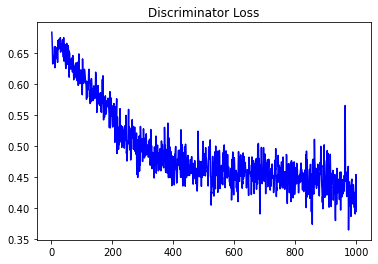

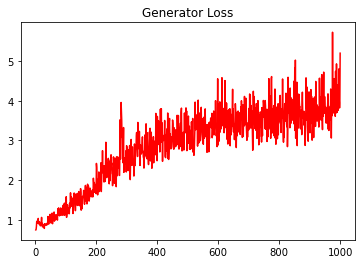

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2973577895660556


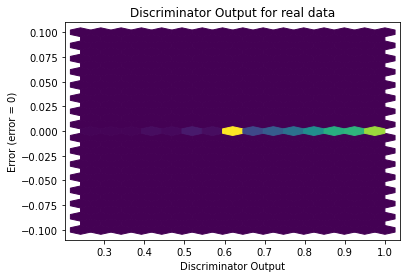

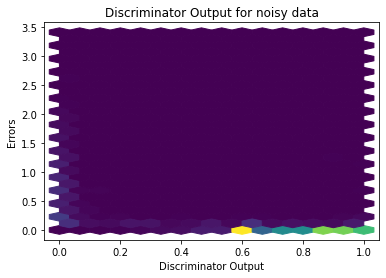

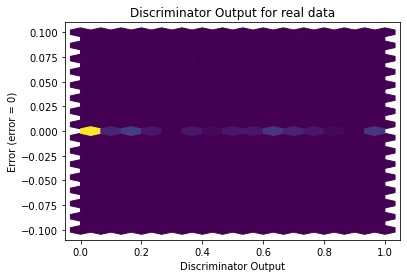

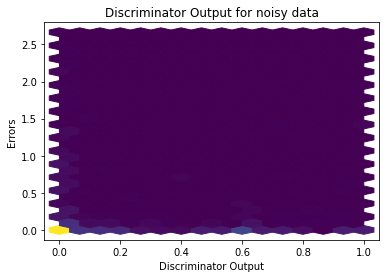

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())